In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dataset_train = pd.read_csv('../data/blogData_train.csv', header=None)
dataset_test = pd.read_csv('../data/blogData_test.csv', header=None)

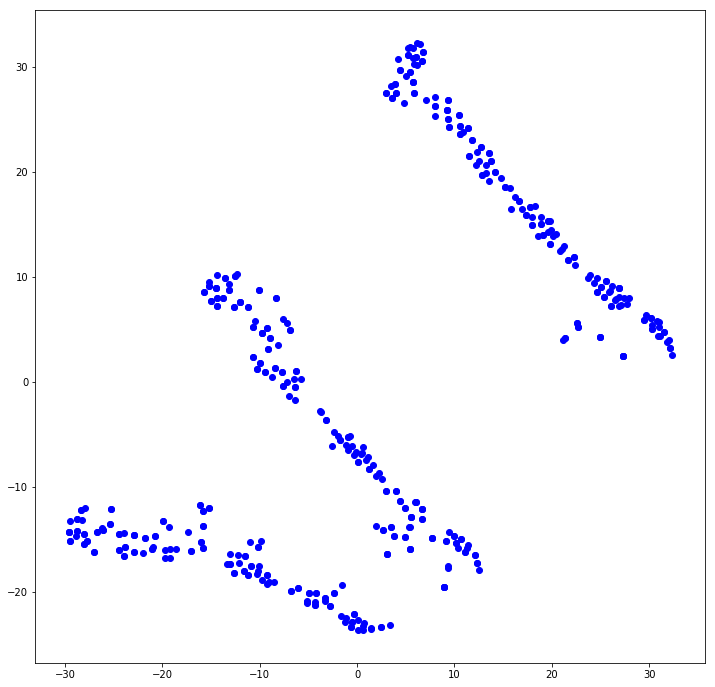

In [3]:
dados = dataset_train.iloc[:500, :280]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (12, 12)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()


In [4]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, 0 to 280
dtypes: float64(281)
memory usage: 112.3 MB
None


In [5]:
print(dataset_train.corr()[:][280]) # individual correlation, variables with target

0      0.485464
1      0.424616
2      0.053221
3      0.356604
4      0.491707
5      0.497631
6      0.433578
7      0.034916
8      0.322106
9      0.506540
10     0.490111
11     0.439152
12          NaN
13     0.322775
14     0.489674
15     0.471999
16     0.384654
17     0.053221
18     0.299688
19     0.486316
20     0.503375
21     0.440003
22    -0.280792
23     0.320133
24    -0.004137
25     0.328525
26     0.266815
27    -0.001228
28     0.247457
29     0.338961
         ...   
251    0.017291
252   -0.002369
253    0.013099
254    0.008334
255   -0.001284
256    0.013151
257    0.001495
258    0.003610
259    0.005246
260    0.019466
261   -0.002411
262   -0.004619
263    0.017965
264    0.011630
265    0.001922
266   -0.009389
267   -0.008288
268   -0.007110
269   -0.000284
270    0.004695
271   -0.003085
272   -0.007672
273    0.008056
274    0.000869
275   -0.002905
276   -0.005661
277         NaN
278   -0.002362
279   -0.001354
280    1.000000
Name: 280, Length: 281, 

## Attribute Information:

|        Line       |                                                                                                                                  Description                                                                                                                                  |
|:-----------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|  **1**...**50**   | Average, standard deviation, min, max and median of the  Attributes 51...60 for the source of the current blog post  With source we mean the blog on which the post appeared.  For example, myblog.blog.org would be the source of  the post myblog.blog.org/post_2010_09_10  |
|       **51**      |                                                                                                                   Total number of comments *before* basetime                                                                                                                  |
|       **52**      |                                                                                                         Number of comments in the last 24 hours *before* the basetime                                                                                                         |
|       **53**      |                                         Let T1 denote the datetime 48 hours *before* basetime,  Let T2 denote the datetime 24 hours *before* basetime.  This attribute is the number of comments in the time period  between T1 and T2                                        |
|       **54**      |                                                                                    Number of comments in the first 24 hours after the  publication of the blog post, but *before* basetime                                                                                    |
|       **55**      |                                                                                                                    The diference of attribute *52* and *53*                                                                                                                   |
|  **56**...**60**  |                                              The same features as the attributes *51*...*55*, but  features *56*...*60* refer to the number of links (trackbacks),  while features *51*...*55* refer to the number of comments.                                               |
|       **61**      |                                                                                                   The length of time between the publication of the blog post  and basetime                                                                                                   |
|       **62**      |                                                                                                                          The length of the blog post                                                                                                                          |
|  **63**...**262** |                                                                                              The 200 bag of *words* features for 200 frequent words of the  text of the blog post                                                                                             |
| **263**...**269** |                                                                                              binary indicator features (0 or 1) for the weekday (Monday...Sunday) of the basetime                                                                                             |
| **270**...**276** |                                                                              binary indicator features (0 or 1) for the weekday  (Monday...Sunday) of the date of publication of the blog  post                                                                               |
|      **277**      |                                                                          Number of parent pages: we consider a blog post P as a  parent of blog post B, if B is a reply (trackback) to  blog post P.                                                                          |
| **278**...**280** |                                                                                                     Minimum, maximum, average number of comments that the parents received                                                                                                    |
|      **281**      |                                                                                                The target: the number of comments in the next 24 hours  (relative to basetime)                                                                                                |
                                                                                                               |

In [6]:
x_train = dataset_train.iloc[:,0:280]
y_train = dataset_train.iloc[:,-1]

x_test = dataset_test.iloc[:, 0:280]
y_test = dataset_test.iloc[:,-1]

In [7]:
from sklearn.linear_model import LinearRegression, LassoCV

# Create the regressor: reg
reg = LassoCV()

# Fit the model to the data
reg.fit(x_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(x_test)

# Print R^2 
print(reg.score(x_test, y_test))
print(cross_val_score(reg, x_test, y_test,scoring='r2'))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

/home/anderson/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.24558153612024228


/home/anderson/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anderson/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anderson/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anderson/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

[-1.13487227e+01 -7.62852334e-03 -2.28425229e-01]
0.24558153612024225
1717.2414536660017


In [8]:
from sklearn.ensemble import RandomForestRegressor

model_rfg = RandomForestRegressor(n_estimators=25)

model_rfg.fit(x_train, y_train)
y_pred = model_rfg.predict(x_test)
print(model_rfg.score(x_test, y_test))
print(cross_val_score(model_rfg,x_test, y_test,scoring='r2'))
print(r2_score(y_test, y_pred))

0.6670300040681046
[-3.72713154  0.0600144  -2.97109994]
0.6670300040681045


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print(gbr.score(x_test, y_test))
print(cross_val_score(gbr,x_test, y_test,scoring='r2'))
print(r2_score(y_test, y_pred))

0.6383751998907967
[-11.01702055   0.0215034   -0.49601301]
0.6383751998907967


In [10]:
from sklearn.model_selection import cross_validate
cv = cross_validate(gbr, x_test, y_test, cv=5)
print(cv)

{'train_score': array([0.99999982, 0.99999975, 0.99999981, 0.99999795, 0.9999997 ]), 'test_score': array([-12.13000729,   0.27917777,  -1.36119037,  -0.02434145,
        -1.93847899]), 'fit_time': array([0.43546557, 0.40551996, 0.4206481 , 0.42235994, 0.45703888]), 'score_time': array([0.00098348, 0.00093317, 0.0009551 , 0.00097632, 0.00096917])}


In [11]:
def plota(x, y, y_pred): # nao funciona ainda
    x_grid = np.arange(min(x), max(x), 0.01)
    x_grid = x_grid.reshape((len(x_grid), 1))
    plt.scatter(x,  y, color='red')
    plt.plot(x_grid, y_pred, color='blue')
    plt.ylabel('Number of comments')
    plt.show()